In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [29]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
df.shape
#1338 rows and 7 columns in dataset

(1338, 7)

In [31]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [32]:
df.dtypes
#3 types of data are present(int64,object,float64)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [33]:
#checking null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [34]:
#cheching information of dataset with memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [35]:
#checking number of unique values in each column
df.nunique().to_frame("No of unique values")

,No of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [36]:
#checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64


sex
male      676
female    662
Name: count, dtype: int64


bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


smoker
no     1064
yes     274
Name: count, dtype: int64


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


charges
1639.56310     2
16884.92400    1
29

In [37]:
#checking duplicate values in dataframe
print("Total duplicate rows:",df.duplicated().sum())

Total duplicate rows: 1


In [38]:
#dropping the duplicate row
df.drop_duplicates(subset=None,inplace=True)

In [39]:
#now duplicate row gone
df.duplicated().sum()

0

In [40]:
#here after deleting 1 duplicate row 1337 rows and 7 columns are present in dataset
df.shape

(1337, 7)

In [41]:
#again checking number of unique values in each column
df.nunique().to_frame("No of unique values")

,No of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [42]:
#separating numerical and categorical columns

#checking for categorical col
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical cols: ",categorical_col)
print("\n")
#checking for numerical col
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("numerical cols: ",numerical_col)
print("\n")

Categorical cols:  ['sex', 'smoker', 'region']


numerical cols:  ['age', 'bmi', 'children', 'charges']




In [43]:
#statiscal summary of numerical solumns
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


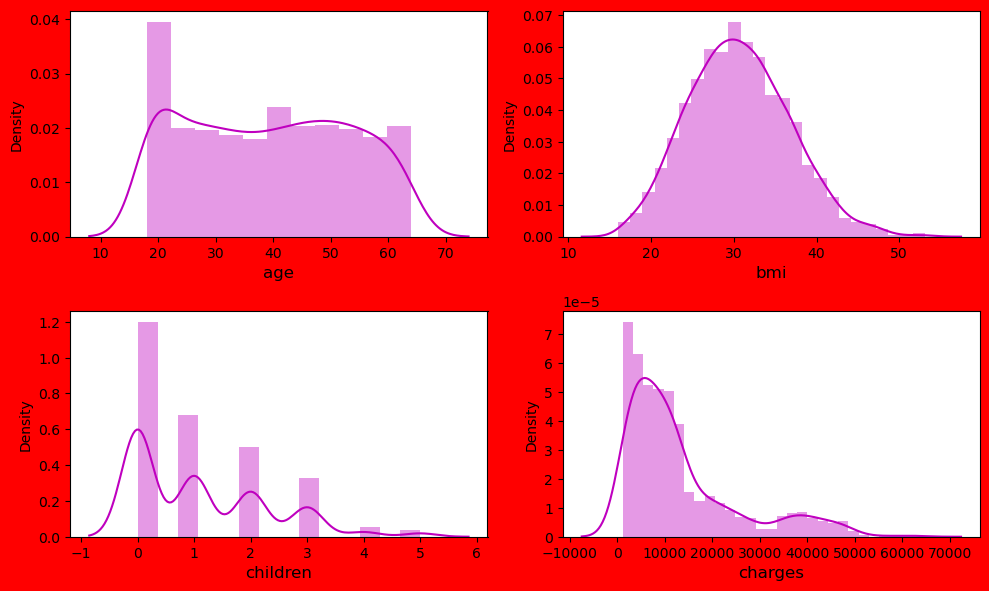

In [45]:
#.......Exploratory Data Analysis......
#lets check how the data has been distributed in numerical column
plt.figure(figsize=(10,6),facecolor="red")
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [79]:
"""here we can see the age and bmi columns looks almost normal distribution but children column have some 
right skewness we can handle it"""

'here we can see the age and bmi columns looks almost normal distribution but children column have some \nright skewness we can handle it'

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


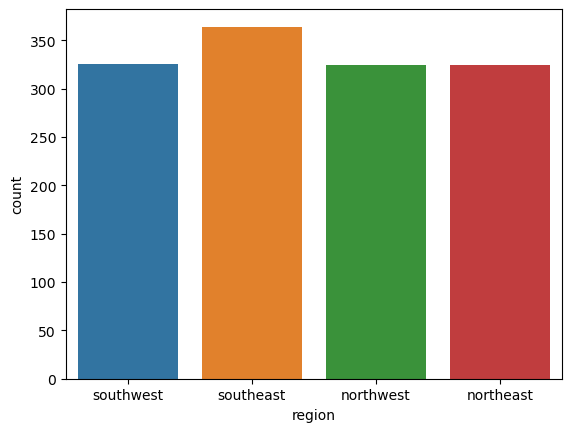

In [47]:
#checking the categorical column analysis
#visualizing the count of region
print(df['region'].value_counts())
ax=sns.countplot(x='region',data=df)
plt.show()

In [48]:
"""the data provided of region in southwest,northwest,northeast is in same range but in southeast little high"""

'the data provided of region in southwest,northwest,northeast is in same range but in southeast little high'

sex
male      675
female    662
Name: count, dtype: int64


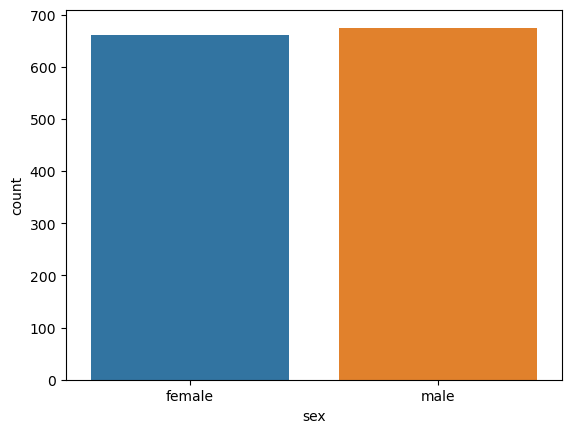

In [49]:
#visualizing the count of sex
print(df['sex'].value_counts())
ax=sns.countplot(x='sex',data=df)
plt.show()

In [50]:
"""the count of female and male is almost equal"""

'the count of female and male is almost equal'

smoker
no     1063
yes     274
Name: count, dtype: int64


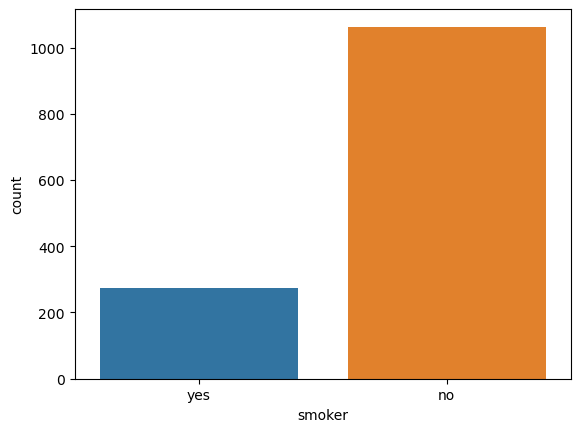

In [51]:
#visualizing the count of smoker
print(df['smoker'].value_counts())
ax=sns.countplot(x='smoker',data=df)
plt.show()

In [52]:
"""the people who is smoker is very low but non-smoker count is high"""

'the people who is smoker is very low but non-smoker count is high'

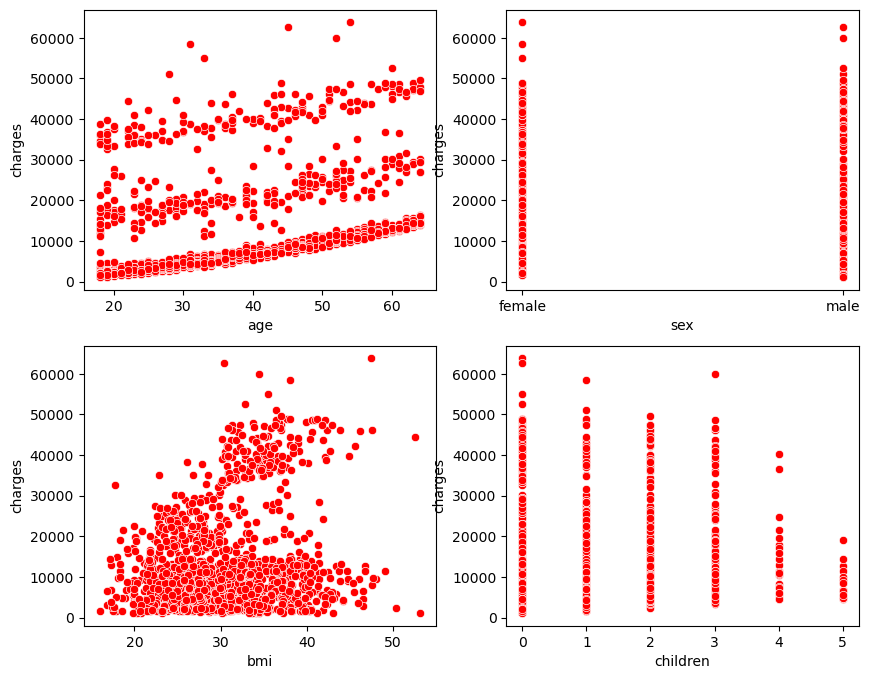

In [57]:
plt.figure(figsize=(10,8))
p=1
for i in df:
    if p<=4:
        plt.subplot(2,2,p)
        sns.scatterplot(x=i,y='charges',data=df,color='r')
        plt.xlabel(i)
        plt.ylabel("charges")
    p+=1
plt.show()

In [58]:
"""from above observations we can say that age increases the charges also increases,charges for both male and female are 
almost same, in bmi range 25-40 when bmi increases charges also increases. In our dataset charges is target variable
and remaining 6 is features."""

'from above observations we can say that age increases the charges also increases,charges for both male and female are \nalmost same, in bmi range 25-40 when bmi increases charges also increases. In our dataset charges is target variable\nand remaining 6 is features.'

In [61]:
#encoding categorical cols using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


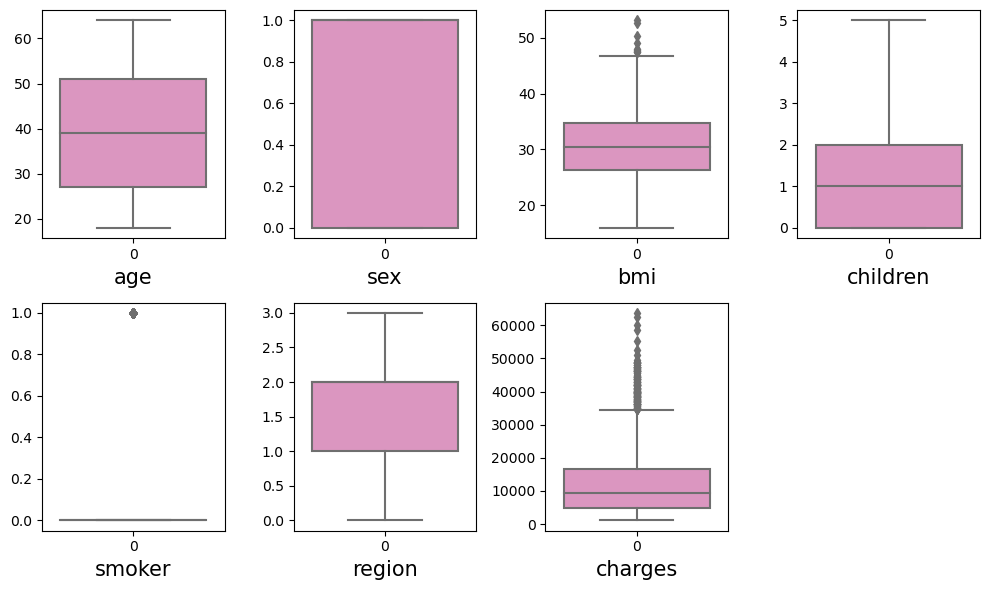

In [62]:
#CHECKING FOR OUTLIERS
#lets check the outliers by plotting boxplot
plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=7:
        ax=plt.subplot(2,4,plotnumber)
        sns.boxplot(df[col],palette="Set2_r")
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [63]:
"""here, we can see outliers present in bmi,smoker and chagres. so, smoker column have categorical data and column charges
 is our target variable so no need to remove outliers of this columns but we can remove outliers in bmi column.
 So, removing the outliers using zscore and IQR techniques """

'here, we can see outliers present in bmi,smoker and chagres. so, smoker column have categorical data and column charges\n is our target variable so no need to remove outliers of this columns but we can remove outliers in bmi column.\n So, removing the outliers using zscore and IQR techniques '

In [69]:
from scipy.stats import zscore
out_features=df[['bmi']]
z=np.abs(zscore(out_features))
z

,bmi
0,0.453160
1,0.509422
2,0.383155
3,1.305052
4,0.292456
...,...
1333,0.050269
1334,0.206053
1335,1.014490
1336,0.797524


In [70]:
#threshold=3
np.where(z>3)

(array([ 116,  846, 1046, 1316], dtype=int64),
 array([0, 0, 0, 0], dtype=int64))

In [71]:
z.iloc[116,0] #HERE, find exact value of above array i.e. z score present at 116 row and index 0th col is 3.016

3.0167243979459

In [72]:
#now removing the data above zscore and creating new df
df1=df[(z<3).all(axis=1)]
df1.shape

(1333, 7)

In [73]:
#shape of old and new dataframe
print("Old data frame ",df.shape[0])
print("new data frame ",df1.shape[0])

Old data frame  1337
new data frame  1333


In [80]:
#lets remove skewness
df.skew()

age         0.054781
sex        -0.019469
bmi         0.283914
children    0.937421
smoker      1.463601
region     -0.039068
charges     1.515391
dtype: float64

In [81]:
#REMOVING SKEWNESS
# removing skewness using cuberoot method
df['children']=np.cbrt(df['children'])

In [82]:
#checking skewness again
df.skew()

age         0.054781
sex        -0.019469
bmi         0.283914
children   -0.098682
smoker      1.463601
region     -0.039068
charges     1.515391
dtype: float64

In [84]:
#checking the correlation between features and target
cor=df.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.047775,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017024,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.016512,0.003746,0.157574,0.198401
children,0.047775,0.017024,0.016512,1.000000,0.011411,0.013750,0.072012
smoker,-0.025587,0.076596,0.003746,0.011411,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.013750,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.072012,0.787234,-0.006547,1.000000


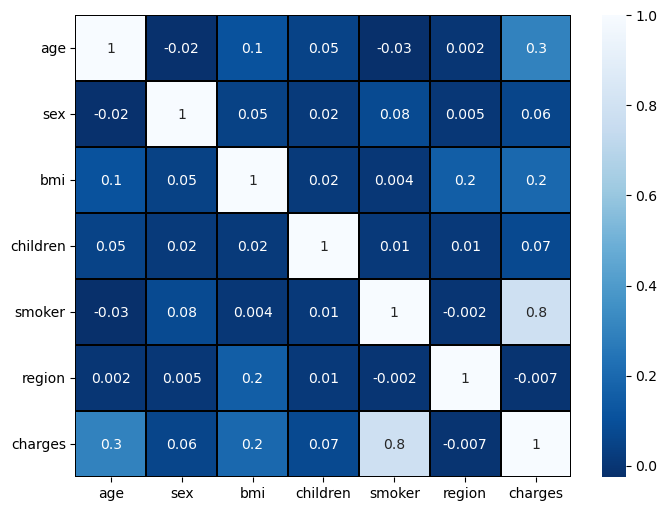

In [86]:
#visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

In [87]:
"""Here This heatmap shows the smoker,BMI,Age are positively correlated with taget variable i.e.
charges remaining region,childern and sex columns are less correlated with target variable so,
we can drop it"""

cor['charges'].sort_values(ascending = False)
#"""We can observe the positive and negative correlated features with the target"""

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.072012
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

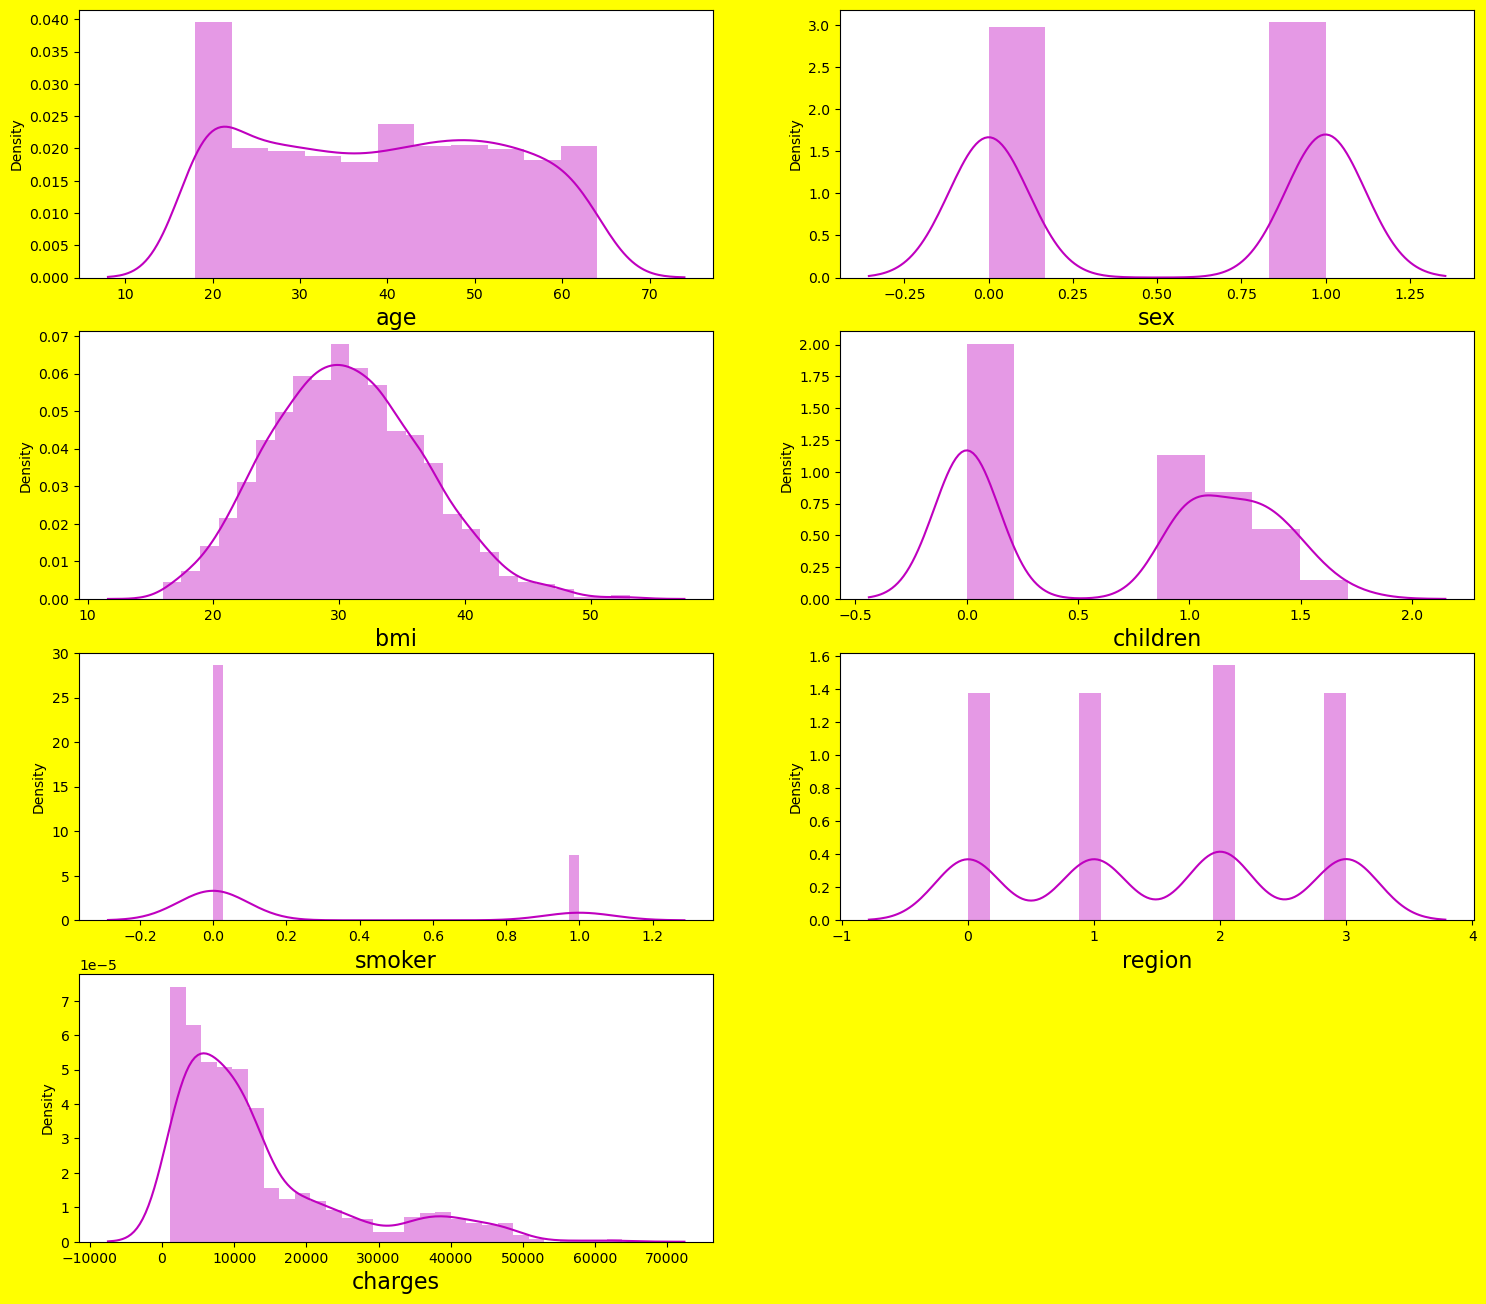

In [92]:
#Checking how the data has been distributed in each column
plt.figure(figsize=(18,16),facecolor='yellow')
plotnumber=1
for column in df:
    if plotnumber<=7:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(df[column],color='m')
        plt.xlabel(column,fontsize=16)
    plotnumber+=1
plt.show()

In [89]:
""""from the above distribution plots we can notice that the data almost looks normalin all the columns
except charges""" 

'"from the above distribution plots we can notice that the data almost looks normalin all the columns\nexcept charges'

In [93]:
#separating the features and label
x=df1.drop("charges",axis=1)
y=df1["charges"]
print("Feature dimensions=",x.shape)
print("Label dimensions=",y.shape)

Feature dimensions= (1333, 6)
Label dimensions= (1333,)


In [94]:
#Feature scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x
#WE have scaled the data using standard scalarization method to overcome the issue of biasness

,age,sex,bmi,children,smoker,region
0,-1.443917,-1.006775,-0.450191,-0.909922,1.970478,1.342851
1,-1.515225,0.993271,0.527991,-0.080854,-0.507491,0.438800
2,-0.802147,0.993271,0.399678,1.577282,-0.507491,0.438800
3,-0.445607,0.993271,-1.315891,-0.909922,-0.507491,-0.465250
4,-0.516915,0.993271,-0.286883,-0.909922,-0.507491,-0.465250
...,...,...,...,...,...,...
1328,0.766626,0.993271,0.061396,1.577282,-0.507491,-0.465250
1329,-1.515225,-1.006775,0.219705,-0.909922,-0.507491,-1.369301
1330,-1.515225,-1.006775,1.041245,-0.909922,-0.507491,0.438800
1331,-1.301302,-1.006775,-0.800137,-0.909922,-0.507491,1.342851


In [95]:
#Checking Variance Inflation Factor(VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,1.017356,age
1,1.008073,sex
2,1.041622,bmi
3,1.002544,children
4,1.006479,smoker
5,1.025430,region


In [96]:
# .....FINDING BEST RANDOM STATE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [98]:
#creating train test split
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Maximum r2 score is ",maxAccu,"on Random state",maxRs)

Maximum r2 score is  0.8000129451663525 on Random state 94


In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=maxRs)

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge

In [101]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)

print('R2_score:',r2_score(y_test,pred_LR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred_LR)))

R2_score: 0.8000129451663525
R2_score on training data: 73.26073440785486
Mean Absolute Error: 3875.3794156913937
Mean Squared Error: 29580008.8443584
Root Mean Squared Error: 62.25254545551847


In [103]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)

print('R2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred_RFR)))

R2_score: 0.8837641642302974
R2_score on training data: 97.29266762076946
Mean Absolute Error: 2442.4798149144453
Mean Squared Error: 17192398.04275929
Root Mean Squared Error: 49.42145095921856


In [105]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)

print('R2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred_GBR)))

R2_score: 0.9045491111715585
R2_score on training data: 89.24065211550378
Mean Absolute Error: 2257.9333235294557
Mean Squared Error: 14118104.484791547
Root Mean Squared Error: 47.51771589133316


In [106]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)

print('R2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:',mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred_lasso)))

R2_score: 0.7999994339978038
R2_score on training data: 73.26073033700085
Mean Absolute Error: 3875.45287445343
Mean Squared Error: 29582007.276134387
Root Mean Squared Error: 62.25313545881388


In [107]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)

print('R2_score:',r2_score(y_test,pred_rd))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred_rd)))

R2_score: 0.7999307879591546
R2_score on training data: 73.26066021870295
Mean Absolute Error: 3877.4177265418784
Mean Squared Error: 29592160.685474128
Root Mean Squared Error: 62.26891460867034


In [108]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)

print('R2_score:',r2_score(y_test,pred_dtr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_dtr))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred_dtr)))

R2_score: 0.7631151496472777
R2_score on training data: 99.87373191426603
Mean Absolute Error: 2681.6594573473058
Mean Squared Error: 35037547.677056536
Root Mean Squared Error: 51.78474154948836


In [109]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)

print('R2_score:',r2_score(y_test,pred_svr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred_svr)))

R2_score: -0.05394704666283978
R2_score on training data: -9.849557225971385
Mean Absolute Error: 8228.456585646705
Mean Squared Error: 155888904.8478899
Root Mean Squared Error: 90.71084050788365


In [110]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)

print('R2_score:',r2_score(y_test,pred_etr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_etr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_etr))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred_etr)))

R2_score: 0.8653266868929792
R2_score on training data: 99.87373191426603
Mean Absolute Error: 2363.198496271109
Mean Squared Error: 19919478.268822834
Root Mean Squared Error: 48.61274006133689


In [111]:
from sklearn.model_selection import cross_val_score

In [112]:
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_LR)-score.mean())*100)

[0.76244183 0.70819898 0.775179   0.73289379 0.75587313]
0.7469173454313716
Difference between R2 score and cross validation score is : 5.30955997349809


In [113]:
score1=cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_RFR)-score1.mean())*100)

[0.85121705 0.77402395 0.86426687 0.82546718 0.85458421]
0.8339118538249123
Difference between R2 score and cross validation score is : 4.9852310405385065


In [114]:
score2=cross_val_score(GBR,x,y)
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_GBR)-score2.mean())*100)

[0.87375227 0.79769876 0.88830683 0.84773668 0.85968935]
0.8534367778577451
Difference between R2 score and cross validation score is : 5.111233331381337


In [115]:
score3=cross_val_score(lasso,x,y)
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_lasso)-score3.mean())*100)

[0.76244813 0.70823259 0.775161   0.73289107 0.75587816]
0.7469221922275621
Difference between R2 score and cross validation score is : 5.307724177024175


In [116]:
score4=cross_val_score(rd,x,y)
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_rd)-score4.mean())*100)

[0.76244687 0.70830249 0.77506506 0.73295139 0.75584442]
0.746922046035292
Difference between R2 score and cross validation score is : 5.300874192386262


In [117]:
score5=cross_val_score(dtr,x,y)
print(score5)
print(score5.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_dtr)-score5.mean())*100)

[0.75192482 0.65905368 0.75586109 0.72416901 0.68498789]
0.7151992980925567
Difference between R2 score and cross validation score is : 4.7915851554721005


In [118]:
score6=cross_val_score(svr,x,y)
print(score6)
print(score6.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_svr)-score6.mean())*100)

[-0.10936209 -0.10897951 -0.07308551 -0.1034408  -0.1048032 ]
-0.09993422196613833
Difference between R2 score and cross validation score is : 4.598717530329854


In [119]:
score7=cross_val_score(etr,x,y)
print(score7)
print(score7.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_etr)-score7.mean())*100)

[0.83422035 0.73988871 0.85106062 0.81404735 0.84123852]
0.8160911097907755
Difference between R2 score and cross validation score is : 4.923557710220372


In [120]:
"""From the difference between both R2 score and cross validation score computed on R2 score we 
can conclude that Random Forest Regressor as our best fitting and best performing model"""

'From the difference between both R2 score and cross validation score computed on R2 score we \ncan conclude that Random Forest Regressor as our best fitting and best performing model'

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
#Hyperparameter Tunning
param={'n_estimators':[20,50,100,200],
      'max_features':['auto','sqrt','log2'],
      'bootstrap':[False,True],
       'min_samples_split':[2],
      'random_state':range(1,20),
      
      }
gscv=GridSearchCV(RandomForestRegressor(),param,n_jobs=-1,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2],
                         'n_estimators': [20, 50, 100, 200],
                         'random_state': range(1, 20)})

In [123]:
gscv.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 200,
 'random_state': 15}

In [124]:
model=RandomForestRegressor(min_samples_split=2,max_features='sqrt',bootstrap=False,random_state=15,n_estimators=200)

In [125]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred)))

R2_score: 0.88091140163207
Mean Absolute Error: 2436.267593253145
Mean Squared Error: 17614349.06832247
Root Mean Squared Error: 49.35856149902614
